# Plot the most volume of White and Gray Matter
Franco Pestilli, The University of Texas 2025

Plotting the volume in mm^3 of volume of the white and gray matter in the most commonly used animals in Neuroscience (plus the Pilot Whale and Helephant for reference)

/var/folders/ym/g0t45zsx6kj122mw2d8vf7zm0000gq/T/ipykernel_48717/2996499442.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab10", num_points)  # "tab10" provides distinct, pretty colors
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


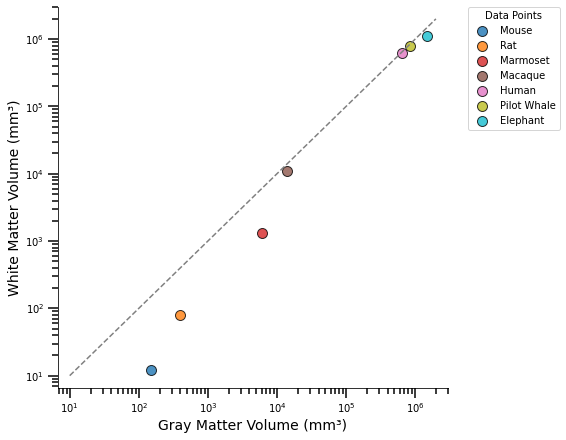

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Sample Data (Replace with actual values)
gray_matter_volumes = np.array([150, 400, 6000, 14000, 650000, 850000, 1500000])
white_matter_volumes = np.array([12, 80, 1300, 11000, 620000, 800000, 1100000])
labels = ["Mouse", "Rat", "Marmoset", "Macaque", "Human", "Pilot Whale", "Elephant"]  # Replace with actual labels

# Create a colormap (using a pretty palette)
num_points = len(labels)
colors = cm.get_cmap("tab10", num_points)  # "tab10" provides distinct, pretty colors

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Scatter plot with unique colors
scatter_points = []
for i in range(num_points):
    point = ax.scatter(gray_matter_volumes[i], white_matter_volumes[i], 
                       color=colors(i), edgecolors="black", s=100, alpha=0.8, label=labels[i])
    scatter_points.append(point)

# Add a diagonal 1:1 reference line
x_vals = np.logspace(1, 6.3, 100)  # Generate log-spaced x values
ax.plot(x_vals, x_vals, linestyle="--", color="gray", linewidth=1.5, label="1:1 Line")  # Diagonal line

# Define tick range (this controls where the ticks appear)
tick_min, tick_max = 1e1, 2*1e6  # Controls the tick positions

# Extend axis limits slightly beyond the tick range to avoid cutoff
axis_padding_factor = 1.5  # 20% extra space beyond tick range
x_min, x_max = tick_min / axis_padding_factor, tick_max * axis_padding_factor
y_min, y_max = tick_min / axis_padding_factor, tick_max * axis_padding_factor

# Set Log-Log scale
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(x_min, x_max)  # Extended axis range
ax.set_ylim(y_min, y_max)  # Extended axis range

# Labels
ax.set_xlabel("Gray Matter Volume (mm³)", fontsize=14)
ax.set_ylabel("White Matter Volume (mm³)", fontsize=14)

# Customize tick styles
ax.tick_params(axis="both", which="both", direction="out", length=6, width=1.5)
ax.tick_params(axis="both", which="major", length=10)

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Create a legend outside the plot
ax.legend(handles=scatter_points, labels=labels, title="Data Points",
          loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Save figure as EPS
plt.savefig("brain_white_and_gray_matter_volume.eps", format="eps", dpi=300, bbox_inches="tight")

# Show plot
plt.show()
